In [1]:
import pandas as pd
df = pd.read_csv('Spam Email Detection - spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

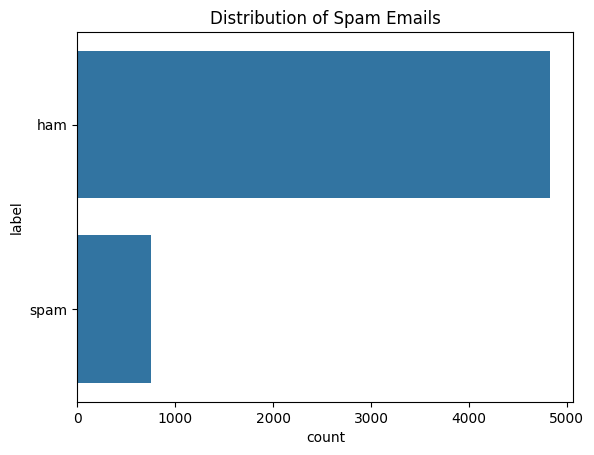

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['label'])
plt.title('Distribution of Spam Emails')
plt.show()

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [6]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label'].map({'ham': 0, 'spam': 1})

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9748878923766816
Confusion Matrix:
[[963   2]
 [ 26 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



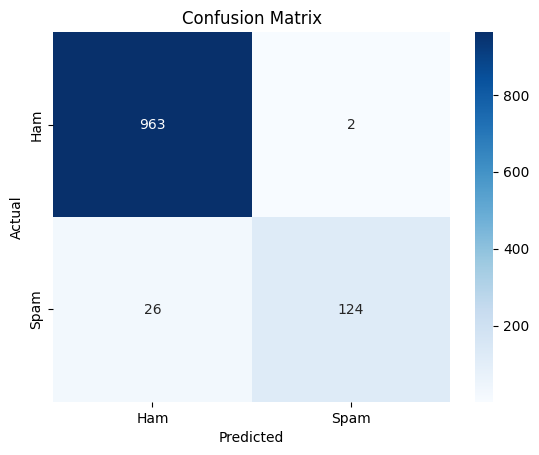

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()